<a href="https://colab.research.google.com/github/gillopy/Era5data3D/blob/main/copernicus_planet_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install cfgrib cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 63.2 MB/s eta 0:00:00


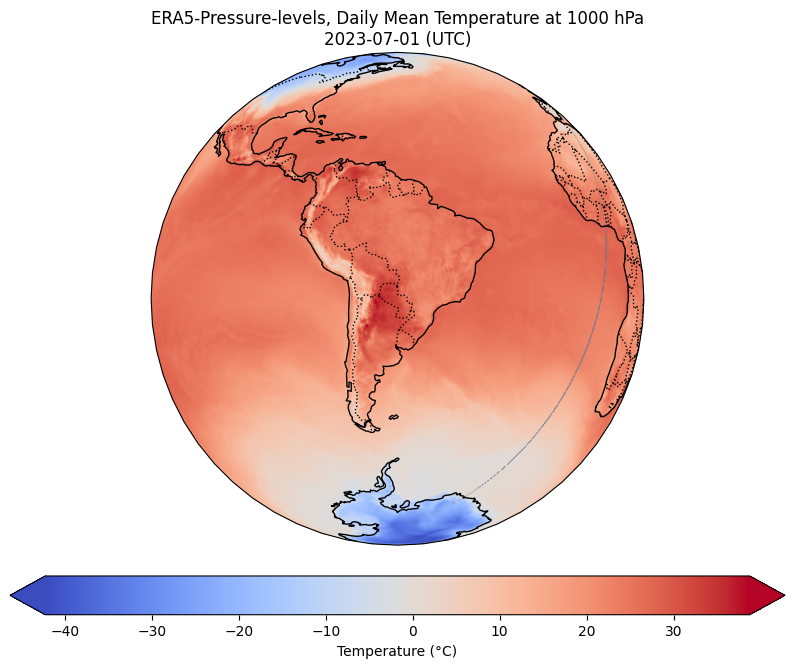

In [ ]:
import numpy as np
import xarray as xr
import cfgrib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings

# Ignorar advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Cargar el dataset GRIB
file_path = "/content/drive/MyDrive/7d83013c8dc90556ff829f0a0327180d.grib"  # Cambia esto con tu archivo real
data = xr.open_dataset(file_path, engine='cfgrib')

# Extraer temperatura y coordenadas
lons = data.longitude.values
lats = data.latitude.values
temp = data.t2m.values[0] - 273.15  # Convertir de Kelvin a Celsius

# Crear la figura
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=ccrs.Orthographic(central_longitude=-58, central_latitude=-23))  # Centrado en Paraguay
ax.set_global()
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Crear el mapa y proyectar los datos
mesh = ax.imshow(temp, extent=[lons.min(), lons.max(), lats.min(), lats.max()], transform=ccrs.PlateCarree(), cmap='coolwarm', origin='upper')

# Agregar barra de colores
cbar = plt.colorbar(mesh, orientation='horizontal', pad=0.05, extend='both')
cbar.set_label('Temperature (°C)')
cbar.set_ticks(np.arange(-40, 40, 10))

# Agregar título
plt.title('ERA5-Pressure-levels, Daily Mean Temperature at 1000 hPa\n2023-07-01 (UTC)')

# Mostrar la figura
plt.show()


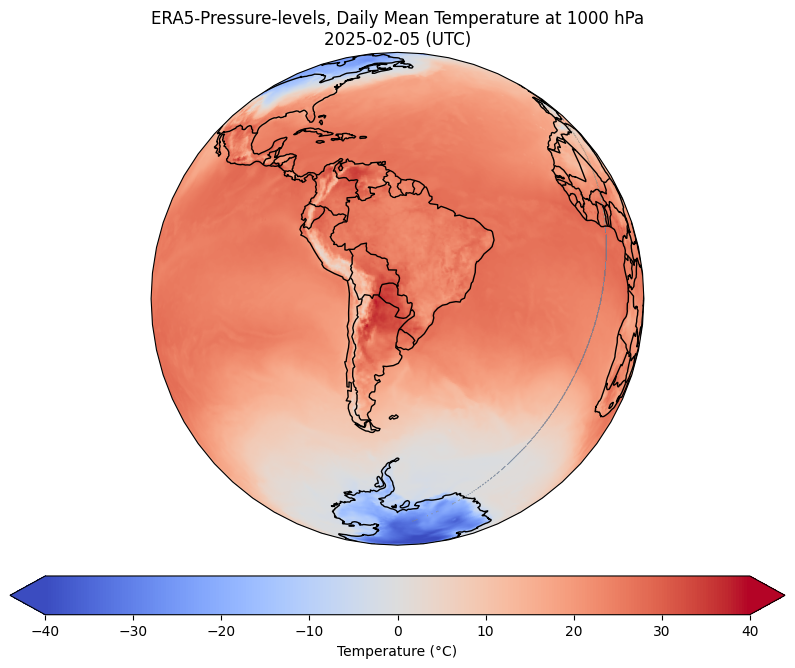

In [ ]:
# Extraer temperatura y coordenadas
lons = data.longitude.values
lats = data.latitude.values
temp = data.t2m.values[0] - 273.15  # Convertir de Kelvin a Celsius

# Crear la figura
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=ccrs.Orthographic(central_longitude=-58, central_latitude=-23))  # Centrado en Paraguay
ax.set_global()
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-')

# Crear el mapa y proyectar los datos con un rango de temperatura más adecuado
vmin, vmax = -40, 40  # Rango de temperatura en grados Celsius
mesh = ax.imshow(temp, extent=[lons.min(), lons.max(), lats.min(), lats.max()],
                 transform=ccrs.PlateCarree(), cmap='coolwarm', origin='upper', vmin=vmin, vmax=vmax)

# Agregar barra de colores con el nuevo rango
cbar = plt.colorbar(mesh, orientation='horizontal', pad=0.05, extend='both')
cbar.set_label('Temperature (°C)')
cbar.set_ticks(np.arange(vmin, vmax + 10, 10))

# Agregar título
plt.title('ERA5-Pressure-levels, Daily Mean Temperature at 1000 hPa\n2025-02-05 (UTC)')

# Mostrar la figura
plt.show()

In [ ]:
data

<xarray.Dataset> Size: 100MB
Dimensions:     (time: 24, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * time        (time) datetime64[ns] 192B 2025-02-05 ... 2025-02-05T23:00:00
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] 192B ...
Data variables:
    t2m         (time, latitude, longitude) float32 100MB 265.4 265.4 ... 237.4
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-12T16:18 GRIB to CDM+CF via cfgrib-0.9.1...

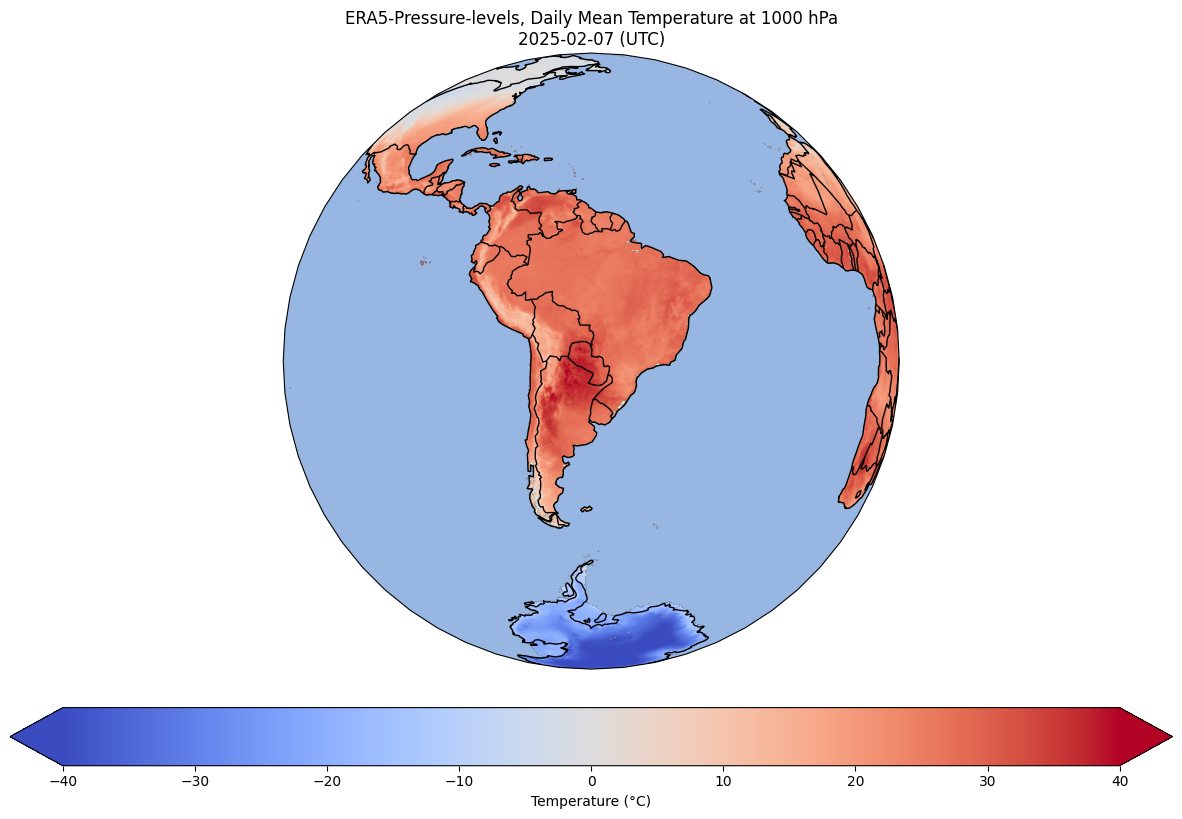

In [ ]:
import numpy as np
import xarray as xr
import cfgrib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import warnings

# Ignorar advertencias específicas
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Cargar el dataset GRIB
file_path = "/content/drive/MyDrive/53ff69f95521585163052af17eefd0c1.grib"  # Cambia esto con tu archivo real
data = xr.open_dataset(file_path, engine='cfgrib')

# Extraer temperatura y coordenadas
lons = data.longitude.values
lats = data.latitude.values
temp = data.stl2.values[0] - 273.15  # Convertir de Kelvin a Celsius

# Crear la figura
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection=ccrs.Orthographic(central_longitude=-58, central_latitude=-23))  # Centrado en Paraguay
ax.set_global()
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='-')

# Crear el mapa y proyectar los datos con un rango de temperatura más adecuado
vmin, vmax = -40, 40  # Rango de temperatura en grados Celsius
mesh = ax.imshow(temp, extent=[lons.min(), lons.max(), lats.min(), lats.max()],
                 transform=ccrs.PlateCarree(), cmap='coolwarm', origin='upper', vmin=vmin, vmax=vmax)

# Agregar barra de colores con el nuevo rango
cbar = plt.colorbar(mesh, orientation='horizontal', pad=0.05, extend='both')
cbar.set_label('Temperature (°C)')
cbar.set_ticks(np.arange(vmin, vmax + 10, 10))

# Agregar título
plt.title('ERA5-Pressure-levels, Daily Mean Temperature at 1000 hPa\n2025-02-07 (UTC)')

# Mostrar la figura
plt.show()

In [ ]:
data

<xarray.Dataset> Size: 622MB
Dimensions:              (time: 24, latitude: 1801, longitude: 3600)
Coordinates:
    number               int64 8B ...
  * time                 (time) datetime64[ns] 192B 2025-02-07 ... 2025-02-07...
    step                 timedelta64[ns] 8B ...
    depthBelowLandLayer  float64 8B ...
  * latitude             (latitude) float64 14kB 90.0 89.9 89.8 ... -89.9 -90.0
  * longitude            (longitude) float64 29kB 0.0 0.1 0.2 ... 359.8 359.9
    valid_time           (time) datetime64[ns] 192B ...
Data variables:
    stl2                 (time, latitude, longitude) float32 622MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-02-13T03:38 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
pip install netCDF4 cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 73.3 MB/s eta 0:00:00


In [ ]:
import netCDF4 as nc

# Ruta del archivo .nc (cambia esto por la ubicación de tu archivo)
file_path = "/content/drive/MyDrive/3c7785ed8c7cf99c2ae80fafa694aef4.nc"

# Cargar el archivo NetCDF4
dataset = nc.Dataset(file_path, mode="r")

# Mostrar información general del dataset
print(dataset)

# Listar las variables disponibles en el archivo
print("\nVariables disponibles:")
print(dataset.variables.keys())

# Explorar los atributos globales del dataset
print("\nAtributos globales:")
for attr in dataset.ncattrs():
    print(f"{attr}: {getattr(dataset, attr)}")

# Cargar una variable específica y mostrar sus dimensiones y valores iniciales
variable_name = list(dataset.variables.keys())[0]  # Tomar la primera variable como ejemplo
var_data = dataset.variables[variable_name]

print(f"\nInformación de la variable '{variable_name}':")
print(var_data)
print("\nPrimeros valores:")
print(var_data[:])  # Imprimir algunos valores de la variable

# Cerrar el dataset
dataset.close()


<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    GRIB_centre: ecmf
    GRIB_centreDescription: European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre: 0
    Conventions: CF-1.7
    institution: European Centre for Medium-Range Weather Forecasts
    history: 2025-02-13T03:06 GRIB to CDM+CF via cfgrib-0.9.15.0/ecCodes-2.39.0 with {"source": "2m_temperature.grib", "filter_by_keys": {}, "encode_cf": ["parameter", "time", "geography", "vertical"]}
earthkit.transforms.aggregate.temporal.daily_reduce(2m_temperature_0, how=mean, **{'time_shift': {'hours': -3}})
    dimensions(sizes): valid_time(1), latitude(1801), longitude(3600)
    variables(dimensions): float32 t2m(valid_time, latitude, longitude), int64 number(), float64 latitude(latitude), float64 longitude(longitude), int64 valid_time(valid_time)
    groups: 

Variables disponibles:
dict_keys(['t2m', 'number', 'latitude', 'longitude', 'valid_time'])

Atributos globales:
GRIB_centre: ecmf
GRI

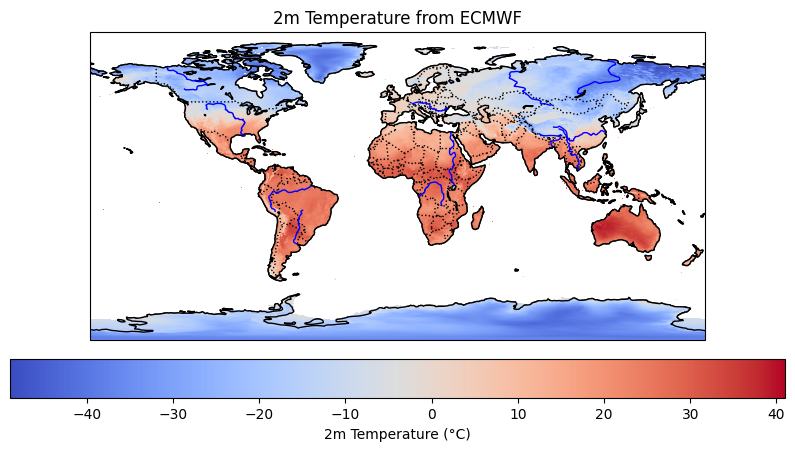

In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Ruta del archivo .nc (cambia esto por la ubicación de tu archivo)
file_path = "/content/drive/MyDrive/3c7785ed8c7cf99c2ae80fafa694aef4.nc"


# Cargar el archivo NetCDF4
dataset = nc.Dataset(file_path, mode="r")

# Obtener las variables necesarias
t2m = dataset.variables['t2m'][0, :, :]  # Seleccionar el primer 'valid_time'
lat = dataset.variables['latitude'][:]
lon = dataset.variables['longitude'][:]

# Convertir a Celsius
t2m_celsius = t2m - 273.15

# Crear la figura y el mapa
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([lon.min(), lon.max(), lat.min(), lat.max()], crs=ccrs.PlateCarree())

# Agregar características al mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# Dibujar la temperatura
c = ax.pcolormesh(lon, lat, t2m_celsius, cmap='coolwarm', transform=ccrs.PlateCarree())

# Agregar barra de color
cbar = plt.colorbar(c, orientation='horizontal', pad=0.05)
cbar.set_label('2m Temperature (°C)')

# Título del gráfico
plt.title("2m Temperature from ECMWF")

# Mostrar el gráfico
plt.show()

# Cerrar el dataset
dataset.close()

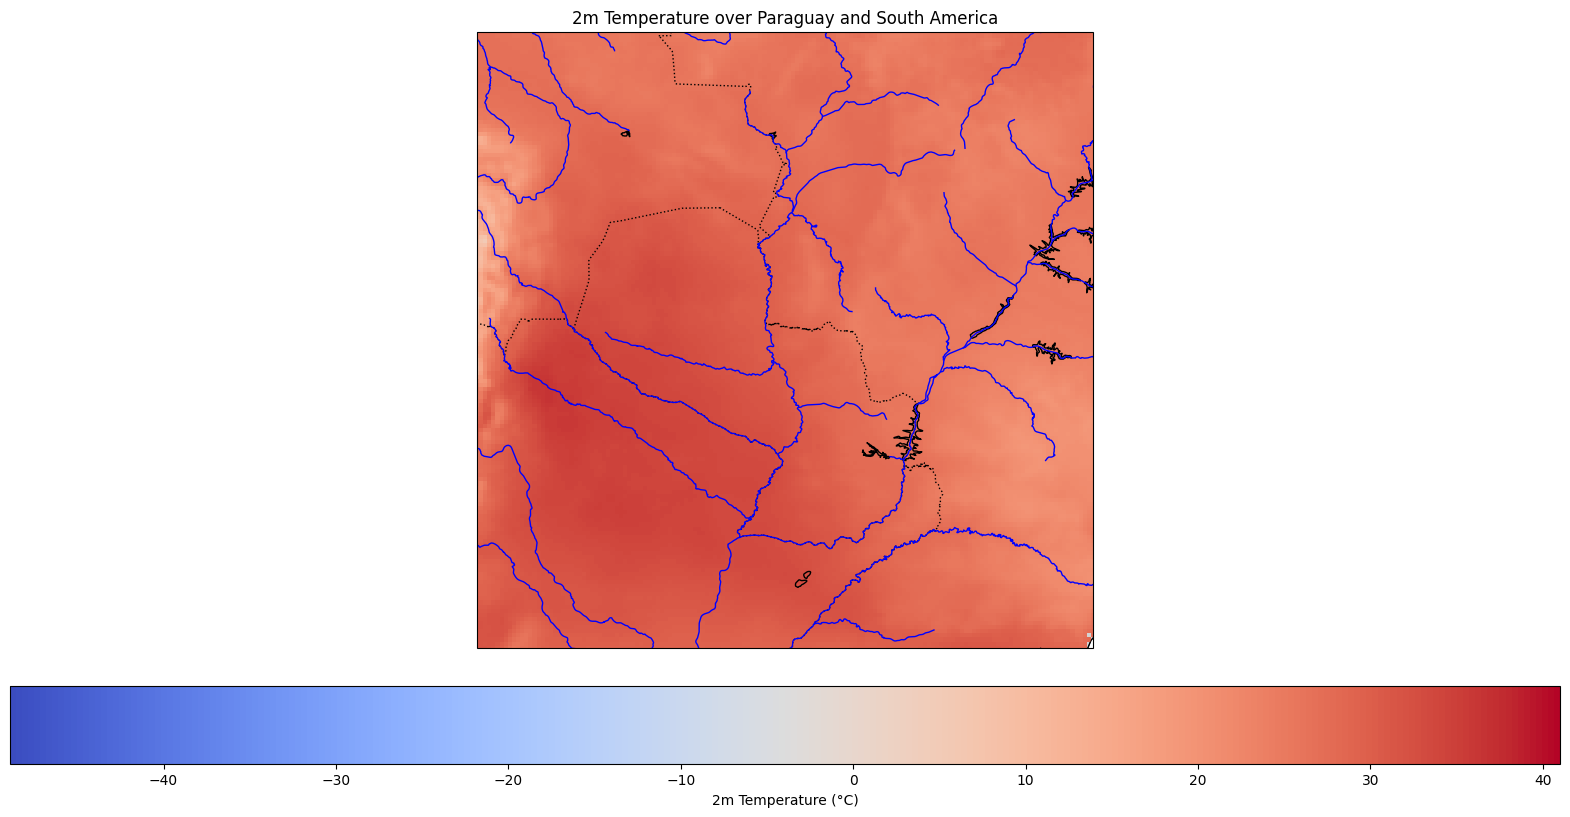

In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Ruta del archivo .nc (cambia esto por la ubicación de tu archivo)
file_path = "/content/drive/MyDrive/3c7785ed8c7cf99c2ae80fafa694aef4.nc"

# Cargar el archivo NetCDF4
dataset = nc.Dataset(file_path, mode="r")

# Obtener las variables necesarias
t2m = dataset.variables['t2m'][0, :, :]  # Seleccionar el primer 'valid_time'
lat = dataset.variables['latitude'][:]
lon = dataset.variables['longitude'][:]

# Convertir a Celsius
t2m_celsius = t2m - 273.15

# Crear la figura y el mapa
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-65, -50, -30, -15], crs=ccrs.PlateCarree())  # Focalizar en Paraguay y alrededores

# Agregar características al mapa
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# Dibujar la temperatura
c = ax.pcolormesh(lon, lat, t2m_celsius, cmap='coolwarm', transform=ccrs.PlateCarree())

# Agregar barra de color
cbar = plt.colorbar(c, orientation='horizontal', pad=0.05)
cbar.set_label('2m Temperature (°C)')

# Título del gráfico
plt.title("2m Temperature over Paraguay and South America")

# Mostrar el gráfico
plt.show()

# Cerrar el dataset
dataset.close()


In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata

# Ruta del archivo .nc (cambia esto por la ubicación de tu archivo)
file_path = "/content/drive/MyDrive/3c7785ed8c7cf99c2ae80fafa694aef4.nc"

# Cargar el archivo NetCDF4
dataset = nc.Dataset(file_path, mode="r")

# Obtener las variables necesarias
t2m = dataset.variables['t2m'][0, :, :]  # Seleccionar el primer 'valid_time'
lat = dataset.variables['latitude'][:]
lon = dataset.variables['longitude'][:]

# Convertir a Celsius
t2m_celsius = t2m - 273.15

# Crear la figura y el mapa
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-65, -50, -30, -15], crs=ccrs.PlateCarree())  # Focalizar en Paraguay y alrededores

# Agregar características al mapa
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')

# Dibujar la temperatura
c = ax.pcolormesh(lon, lat, t2m_celsius, cmap='coolwarm', transform=ccrs.PlateCarree())

# Agregar barra de color
cbar = plt.colorbar(c, orientation='horizontal', pad=0.05)
cbar.set_label('2m Temperature (°C)')

# Lista de ciudades con coordenadas (lat, lon)
ciudades = {
    "Asunción": (-25.2637, -57.5759),
    "Ciudad del Este": (-25.5167, -54.6167),
    "Encarnación": (-27.3306, -55.8667),
    "Villarrica": (-25.75, -56.4333),
    "Pedro Juan Caballero": (-22.555, -55.7333)
}

# Interpolar temperatura en las coordenadas de las ciudades
lon_grid, lat_grid = np.meshgrid(lon, lat)
temperaturas = griddata((lon_grid.ravel(), lat_grid.ravel()), t2m_celsius.ravel(),
                        [(ciudades[ciudad][1], ciudades[ciudad][0]) for ciudad in ciudades], method='linear')

# Agregar etiquetas con la temperatura en cada ciudad
for (ciudad, (lat_c, lon_c)), temp in zip(ciudades.items(), temperaturas):
    ax.text(lon_c, lat_c, f"{ciudad}\n{temp:.1f}°C", fontsize=12, ha='center', va='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

# Título del gráfico
plt.title("2m Temperature over Paraguay and South America")

# Mostrar el gráfico
plt.show()

# Cerrar el dataset
dataset.close()


<ipython-input-3-b6ffd35e1155>:58: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  ax.text(lon_c, lat_c, f"{ciudad}\n{temp_ciudad:.1f}°C", fontsize=12, ha='center', va='center',


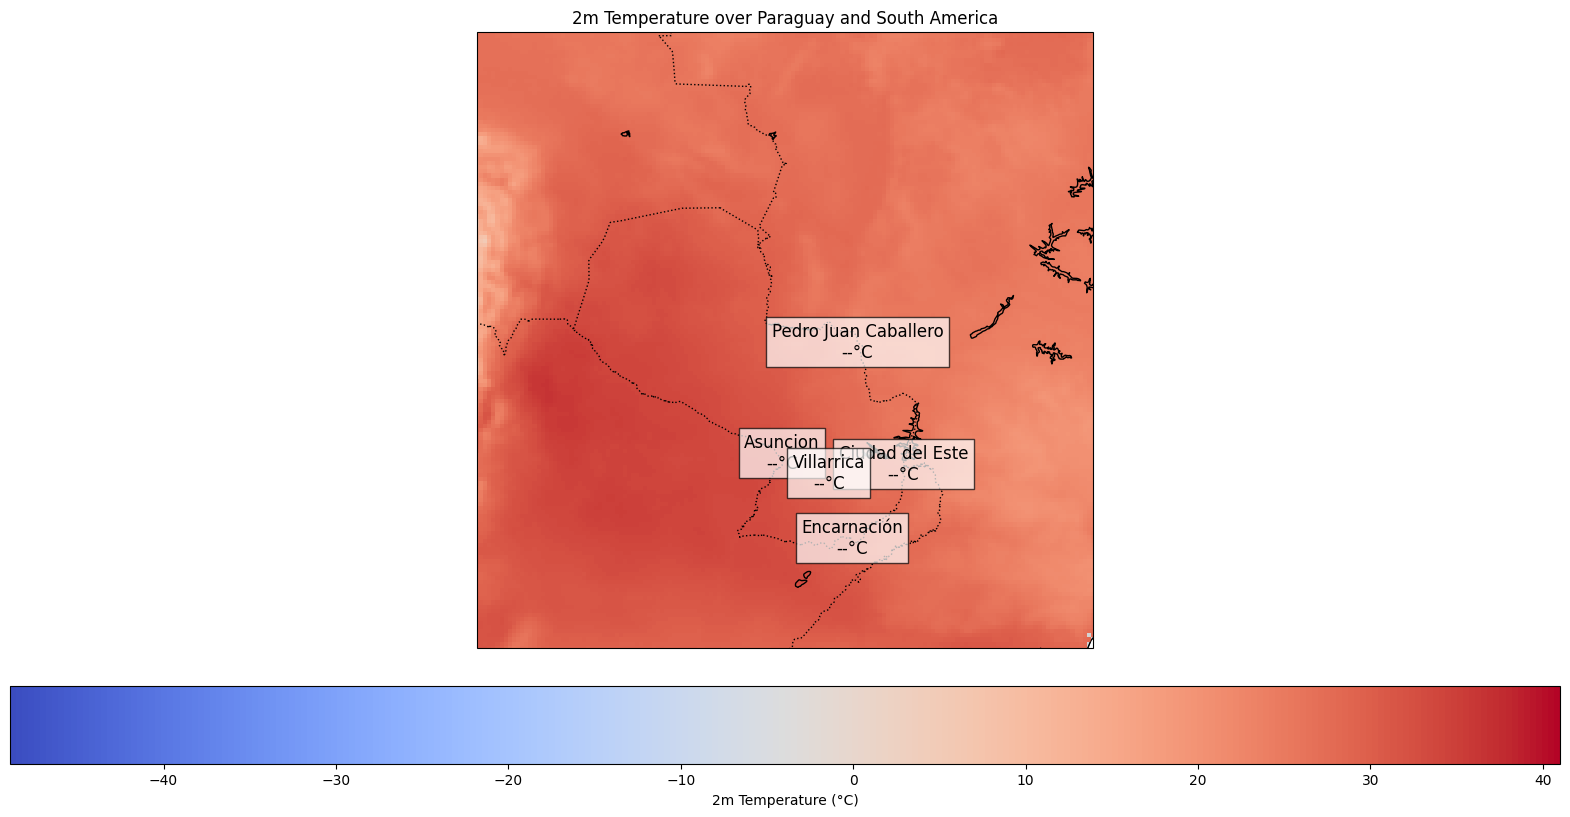

In [ ]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Ruta del archivo .nc
file_path = "/content/drive/MyDrive/3c7785ed8c7cf99c2ae80fafa694aef4.nc"

# Cargar el archivo NetCDF4
dataset = nc.Dataset(file_path, mode="r")

# Obtener las variables necesarias
t2m = dataset.variables['t2m'][0, :, :]  # Seleccionar el primer 'valid_time'
lat = dataset.variables['latitude'][:]
lon = dataset.variables['longitude'][:]

# Convertir a Celsius
t2m_celsius = t2m - 273.15

# Crear la figura y el mapa
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-65, -50, -30, -15], crs=ccrs.PlateCarree())  # Focalizar en Paraguay y alrededores

# Agregar características al mapa
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')

# Dibujar la temperatura
c = ax.pcolormesh(lon, lat, t2m_celsius, cmap='coolwarm', transform=ccrs.PlateCarree())

# Agregar barra de color
cbar = plt.colorbar(c, orientation='horizontal', pad=0.05)
cbar.set_label('2m Temperature (°C)')

# Lista de ciudades con coordenadas (lat, lon)
ciudades = {
    "Asuncion": (-25.2637, -57.5759),
    "Ciudad del Este": (-25.5167, -54.6167),
    "Encarnación": (-27.3306, -55.8667),
    "Villarrica": (-25.75, -56.4333),
    "Pedro Juan Caballero": (-22.555, -55.7333)
}

# Función para encontrar el índice más cercano en la grilla
def encontrar_indice(valor, array):
    return np.abs(array - valor).argmin()

# Obtener la temperatura más cercana para cada ciudad
for ciudad, (lat_c, lon_c) in ciudades.items():
    idx_lat = encontrar_indice(lat_c, lat)
    idx_lon = encontrar_indice(lon_c, lon)
    temp_ciudad = t2m_celsius[idx_lat, idx_lon]

    # Agregar texto en el mapa
    ax.text(lon_c, lat_c, f"{ciudad}\n{temp_ciudad:.1f}°C", fontsize=12, ha='center', va='center',
            bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

# Título del gráfico
plt.title("2m Temperature over Paraguay and South America")

# Mostrar el gráfico
plt.show()

# Cerrar el dataset
dataset.close()


In [2]:
pip install netCDF4 cartopy geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.1 MB/s eta 0:00:00


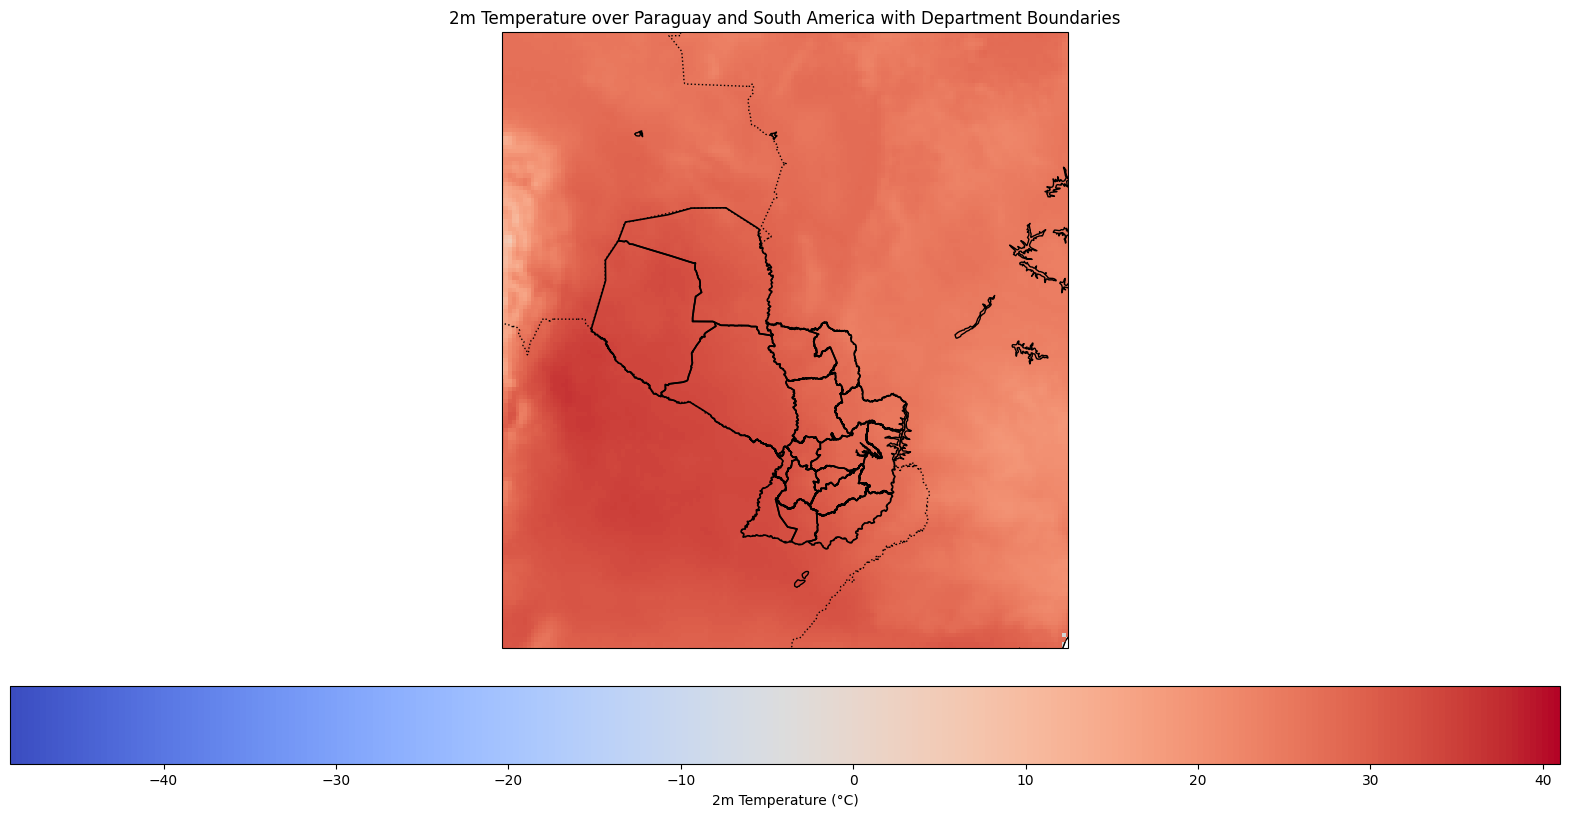

In [4]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd

# Ruta del archivo .nc (modifica según tu ubicación)
file_path = "/content/drive/MyDrive/3c7785ed8c7cf99c2ae80fafa694aef4.nc"

# Ruta del archivo GeoJSON (modifica según tu ubicación)
geojson_path = "/content/drive/MyDrive/DEPARTAMENTOS_PY_CNPV2022.geojson.txt"

# Cargar el archivo NetCDF4
dataset = nc.Dataset(file_path, mode="r")

# Obtener las variables necesarias
t2m = dataset.variables['t2m'][0, :, :]  # Seleccionar el primer 'valid_time'
lat = dataset.variables['latitude'][:]
lon = dataset.variables['longitude'][:]

# Convertir a Celsius
t2m_celsius = t2m - 273.15

# Cargar el archivo GeoJSON
gdf = gpd.read_file(geojson_path)

# Crear la figura y el mapa
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-65, -50, -30, -15], crs=ccrs.PlateCarree())  # Ajusta según el país de interés

# Agregar características al mapa
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor='none')
#ax.add_feature(cfeature.RIVERS, edgecolor='blue')

# Dibujar la temperatura
c = ax.pcolormesh(lon, lat, t2m_celsius, cmap='coolwarm', transform=ccrs.PlateCarree())

# Agregar el GeoJSON con los límites de los departamentos
gdf.boundary.plot(ax=ax, edgecolor="black", linewidth=1.2, transform=ccrs.PlateCarree())

# Agregar barra de color
cbar = plt.colorbar(c, orientation='horizontal', pad=0.05)
cbar.set_label('2m Temperature (°C)')

# Título del gráfico
plt.title("2m Temperature over Paraguay and South America with Department Boundaries")

# Mostrar el gráfico
plt.show()

# Cerrar el dataset
dataset.close()
